# 보험료 예측 실습
## 1.  데이터 확인 및 분석 프로세스 수집

### 데이터 형식 확인 후 아래 사항 확인  
- 모르는 용어, 전문 용어, 명백하게 필요 없는 항목이 있는지
- 예측/분류/군집 분석 가능한 시나리오가 있는지

데이터 형식 예시  

|age|sex|bmi|children|smoker|region|charges|
|---|---|---|---|---|---|---|
|19|female|27.9|0|yes|southwest|16884.92|
|18|male|33.77|1|no|northwest|1725.552|


### 분석 프로세스 수립

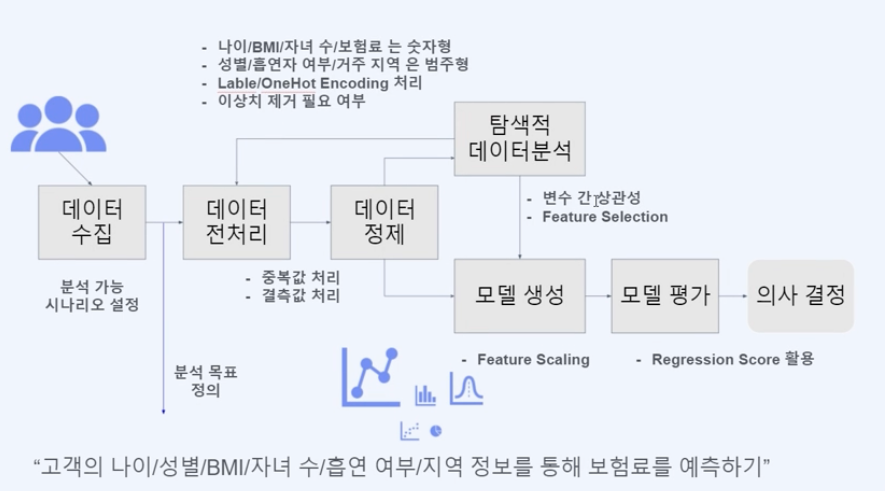

## 2. 데이터 준비

### 2-1. 중복 데이터 타입 처리

In [15]:
# 필요 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import missingno

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score

데이터 준비를 위한 EDA 및 전처리는 아래 사항들을 확인  
- 데이터: 현재 디렉토리의 `ch1_premium.csv`  
- EDA 체크리스트
  1. 어떤 질문을 풀거나 틀렸다고 증명하려고 하는가?  
  2. 중복된 항목은 있는가?
  3. 어떤 종류의 데이터가 있으며 다른 데이터 타입들을 어떻게 다루려고 하는가?
  4. 데이터에서 누락된 것이 있는지, 있다면 그것들을 어떻게 처리하려는가?
  5. 이상치는 어디에 있는가? 관심을 가져야 할 데이터인가?
  6. 변수 간 상관성이 있는가?


In [16]:
# 데이터 불러오기

data = pd.read_csv("/content/drive/MyDrive/MLStudy/Data_Anaylsis_And_Machine_Learning/02_insurance_fee_prediction/ch1_premium.csv")

목표: 보험사 고객 정보를 통해 보험료 예측 모델을 생성하려고 함  

간략하게 데이터 살피기

In [17]:
# 데이터의 모양 알아보기
data.shape

(1338, 7)

In [18]:
# 데이터의 15개 행 데이터만 확인하기
data.head(15)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


중복된 항목이 있는 지 확인

In [19]:
# 중복된 항목 알아보기
data[data.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [20]:
# 중복된 항목 수 확인
print(f"중복된 항목 수: {len(data[data.duplicated()])}")

중복된 항목 수: 1


In [21]:
# 중복된 항목 확인
data[data.duplicated(keep=False)].sort_values(by=list(data.columns)).head()

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [22]:
# 중복된 항목 제거
data.drop_duplicates(inplace=True, keep="first", ignore_index=True)

In [23]:
# 중복된 항목이 제거되어 이전보다 row 하나 감소
data.shape

(1337, 7)

어떤 종류의 데이터가 있으며 다른 데이터 타입들을 어떻게 다루려고 하는 지 확인  
> 총 컬럼 수와 컬럼별 데이터 타입 확인  

In [24]:
# 데이터 컬럼 이름/타입 정보 확인

In [25]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1332 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB
None


In [26]:
# 데이터 타입별 컬럼 수 확인
dtype_data = data.dtypes.reset_index()
dtype_data.columns = ["Count", "Column Type"]
dtype_data = dtype_data.groupby("Column Type").aggregate('count').reset_index()
dtype_data

,Column Type,Count
0,int64,2
1,float64,2
2,object,3


다음 사항 확인  
- 숫자형 데이터 중 명백하게 포함할 의미가 없는 것은 없는 지
- 범주형 변수는 있는지  

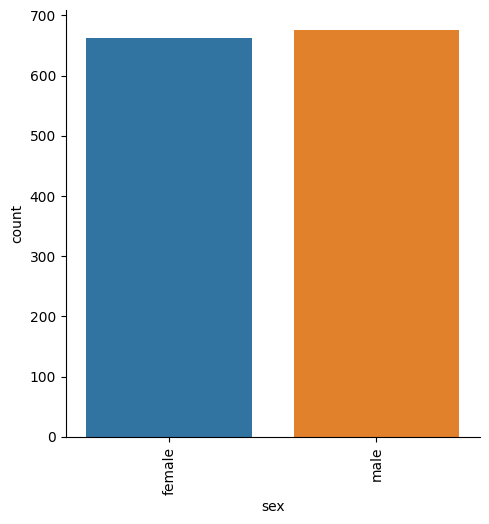

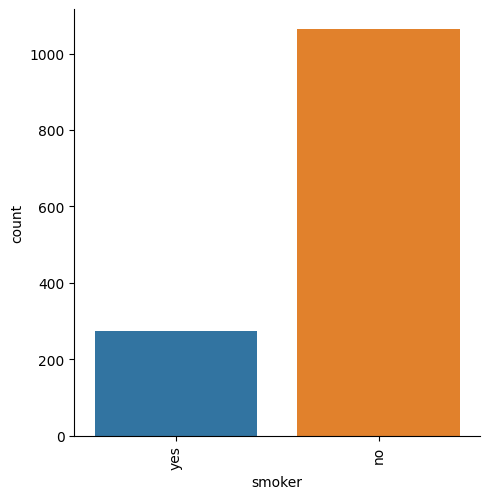

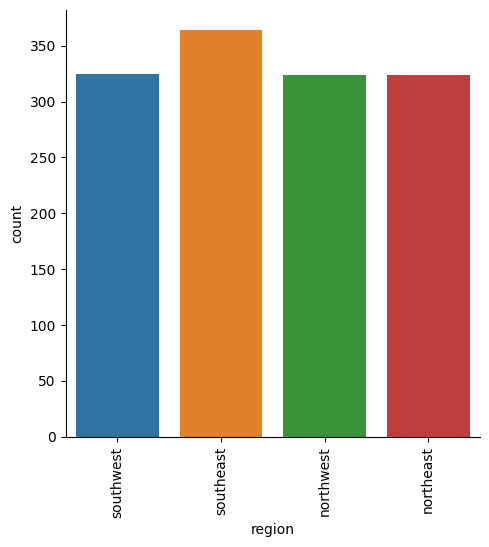

In [27]:
# 범주형 변수별 개수 시각화
for col in data.select_dtypes(include=['object', 'category']).columns:
  fig = sns.catplot(x=col, kind="count", data=data, hue=None)
  fig.set_xticklabels(rotation=90)
  plt.show()

In [28]:
# 데이터 컬럼별 유일한 값 개수 확인하기
data.select_dtypes(include=['object', 'category']).nunique()

sex       2
smoker    2
region    4
dtype: int64

데이터 탐색 결과 항목이 2개인 성별과 흡연 여부는 `LabelEncoder`를, 지역은 `OneHotEncoder`를 사용하기로 함  

### 2-2. 범주형 변수 변환


In [30]:
# sklearn의 LabelEncoder, OneHotEncoder 사용
# LabelEncoder: 각각의 범주를 서로 다른 정수로 맵핑
# 성별, 흡연 여부 컬럼은 Label Encoding을 위해 ndarray로 변환

In [56]:
sex = data.iloc[:, 1:2].values
smoker = data.iloc[:, 4:5].values

In [51]:
sex

array([['female'],
       ['male'],
       ['male'],
       ...,
       ['female'],
       ['female'],
       ['female']], dtype=object)

In [52]:
smoker

array([['yes'],
       ['no'],
       ['no'],
       ...,
       ['no'],
       ['no'],
       ['yes']], dtype=object)

In [53]:
from sklearn.preprocessing import LabelEncoder

### 성별  ###
# 1. LabelEncoder() 선언
le = LabelEncoder()

# 2. 성별을 LabelEncoder의 fit_transform에 넣어줌
sex[:, 0] = le.fit_transform(sex[:, 0])
sex = pd.DataFrame(sex)
sex.columns = ['sex']
print(sex)

# 3. dict 형으로 변환
print("\nle.classes_:", le.classes_)
le_sex_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("\n성별에 대한 Label Encoder 결과: ")
print(le_sex_mapping)
print(sex[:10])

     sex
0      0
1      1
2      1
3      1
4      1
...   ..
1332   1
1333   0
1334   0
1335   0
1336   0

[1337 rows x 1 columns]

le.classes_: ['female' 'male']

성별에 대한 Label Encoder 결과: 
{'female': 0, 'male': 1}
  sex
0   0
1   1
2   1
3   1
4   1
5   0
6   0
7   0
8   1
9   0


In [57]:
### 흡연 여부 ###
# 1. LabelEncoder() 선언
le = LabelEncoder()

# 2. 흡연 여부를 LabelEncoder의 fit_transform에 넣어줌
smoker[:, 0] = le.fit_transform(smoker[:, 0])
smoker = pd.DataFrame(smoker)
smoker.columns = ['smoker']
print(smoker)

# 3. dict 형으로 변환해주기
le_smoker_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("\n흡연 여부에 대한 Label Encoder 결과")
print(le_smoker_mapping)
print(smoker[:10])

     smoker
0         1
1         0
2         0
3         0
4         0
...     ...
1332      0
1333      0
1334      0
1335      0
1336      1

[1337 rows x 1 columns]

흡연 여부에 대한 Label Encoder 결과
{'no': 0, 'yes': 1}
  smoker
0      1
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0


In [59]:
# OneHotEncoder: 각각의 범주를 0과 1로 맵핑
## 지역 컬럼은 OneHotEncoding을 위해 ndarray로 변환

In [70]:
from sklearn.preprocessing import OneHotEncoder

region = data.iloc[:, 5:6].values

### 지역 ###
# 1. OneHotEncoder() 선언
ohe = OneHotEncoder()

# 2. 지역을 OneHotEncoder의 fit_transform에 넣어줌
region = ohe.fit_transform(region).toarray()
region = pd.DataFrame(region)
region.columns = ['northeast', 'northwest', 'southeast', 'southwest']
print("지역에 대한 OneHotEncoder 결과")
print(region[:10])

지역에 대한 OneHotEncoder 결과
   northeast  northwest  southeast  southwest
0        0.0        0.0        0.0        1.0
1        0.0        0.0        1.0        0.0
2        0.0        0.0        1.0        0.0
3        0.0        1.0        0.0        0.0
4        0.0        1.0        0.0        0.0
5        0.0        0.0        1.0        0.0
6        0.0        0.0        1.0        0.0
7        0.0        1.0        0.0        0.0
8        1.0        0.0        0.0        0.0
9        0.0        1.0        0.0        0.0


### 2-3 데이터 결측값 처리

> NULL 값이 포함된 컬럼 찾기 -> 각 컬럼의 평균값으로 채우기 (Imputation 또는 보간법)

bmi    5
dtype: int64


<Axes: >

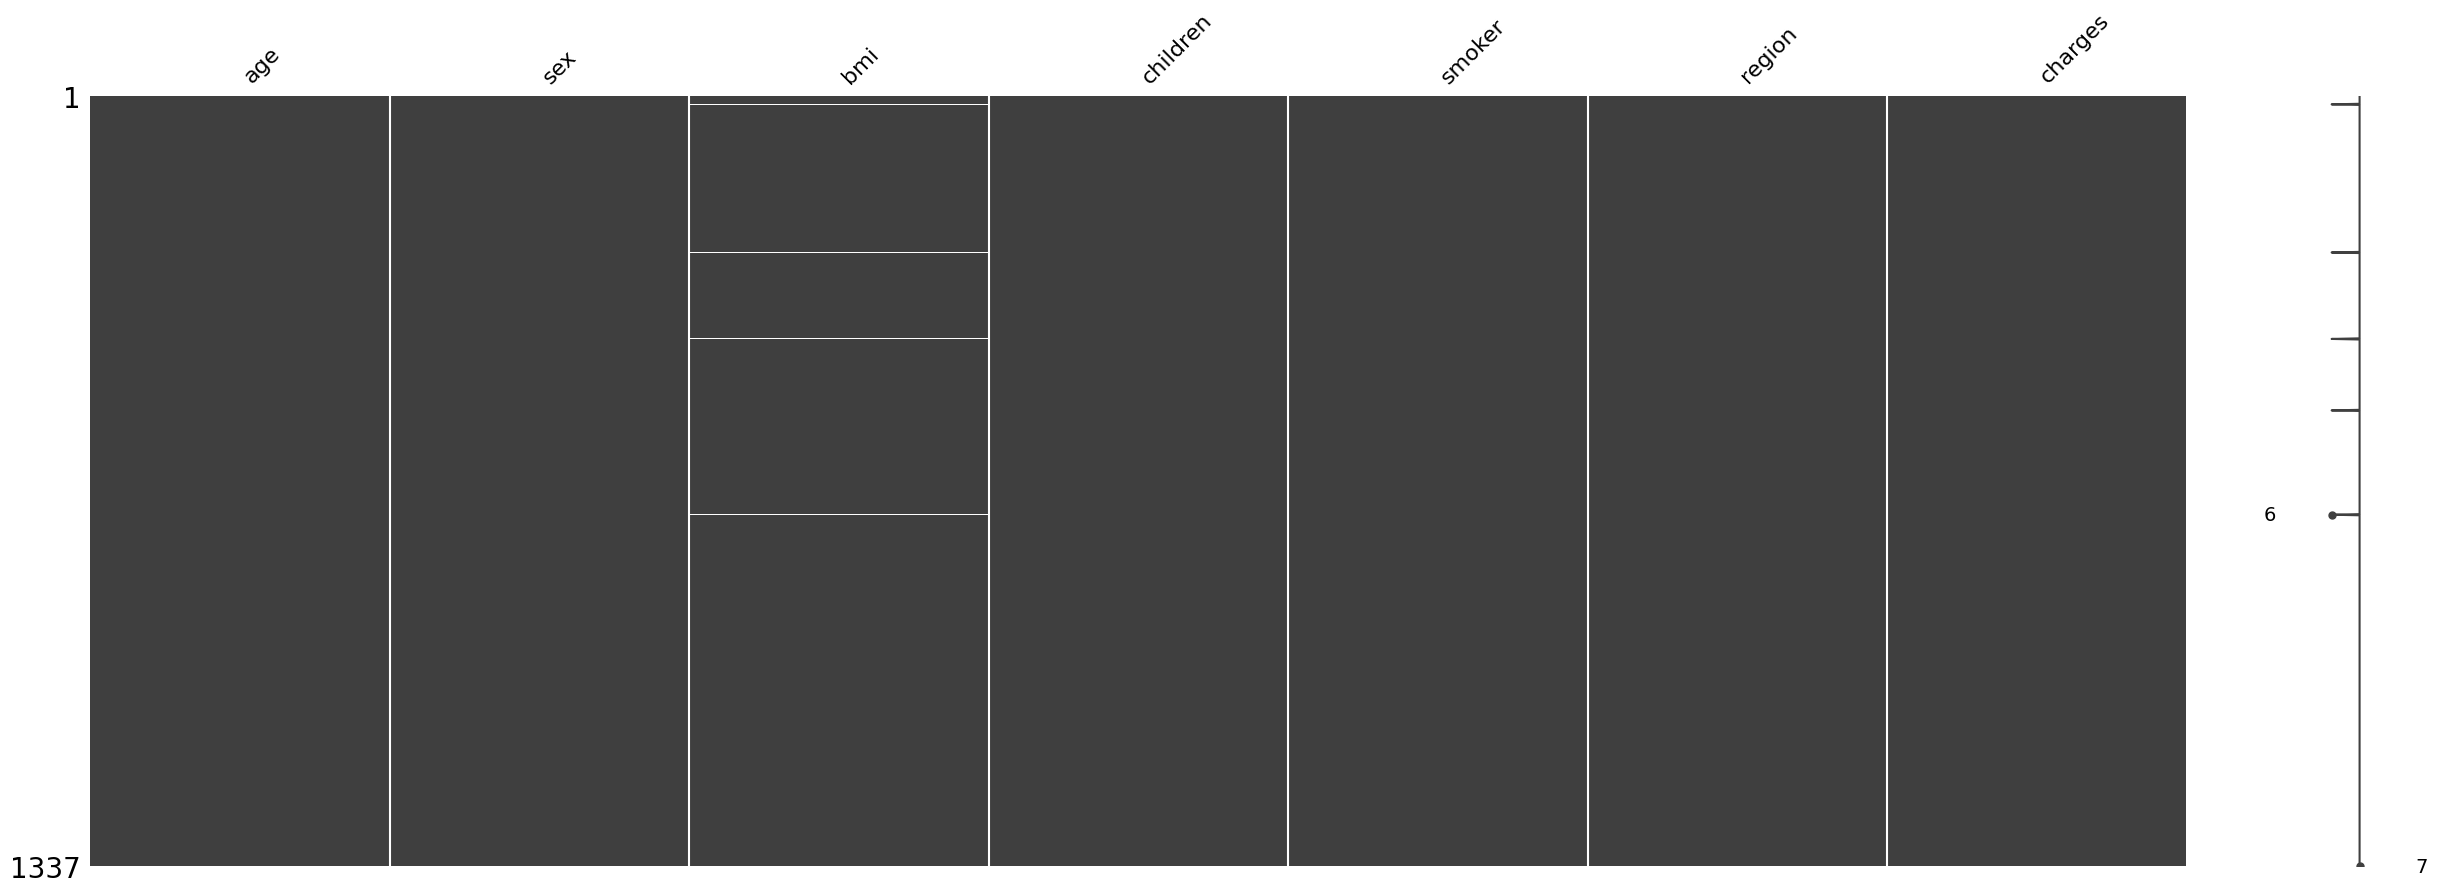

In [73]:
# 각 컬럼들에 몇 개의 NULL 값이 포함되어 있는지 확인
count_nan = data.isnull().sum()
print(count_nan[count_nan > 0])

# missingno 패키지를 통해 시각화 확인
missingno.matrix(data, figsize=(30, 10))

<Axes: >

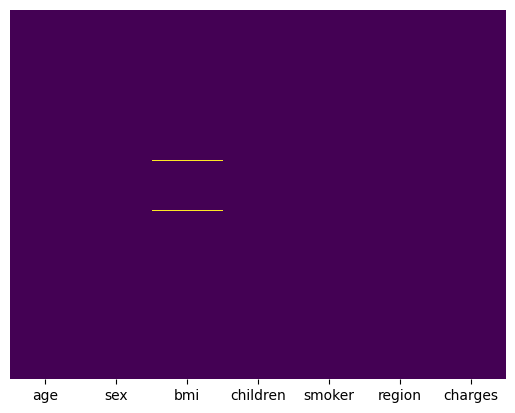

In [74]:
# seaborn 패키지 heatmap을 통해 시각화 확인
sns.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap='viridis')

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


<Axes: >

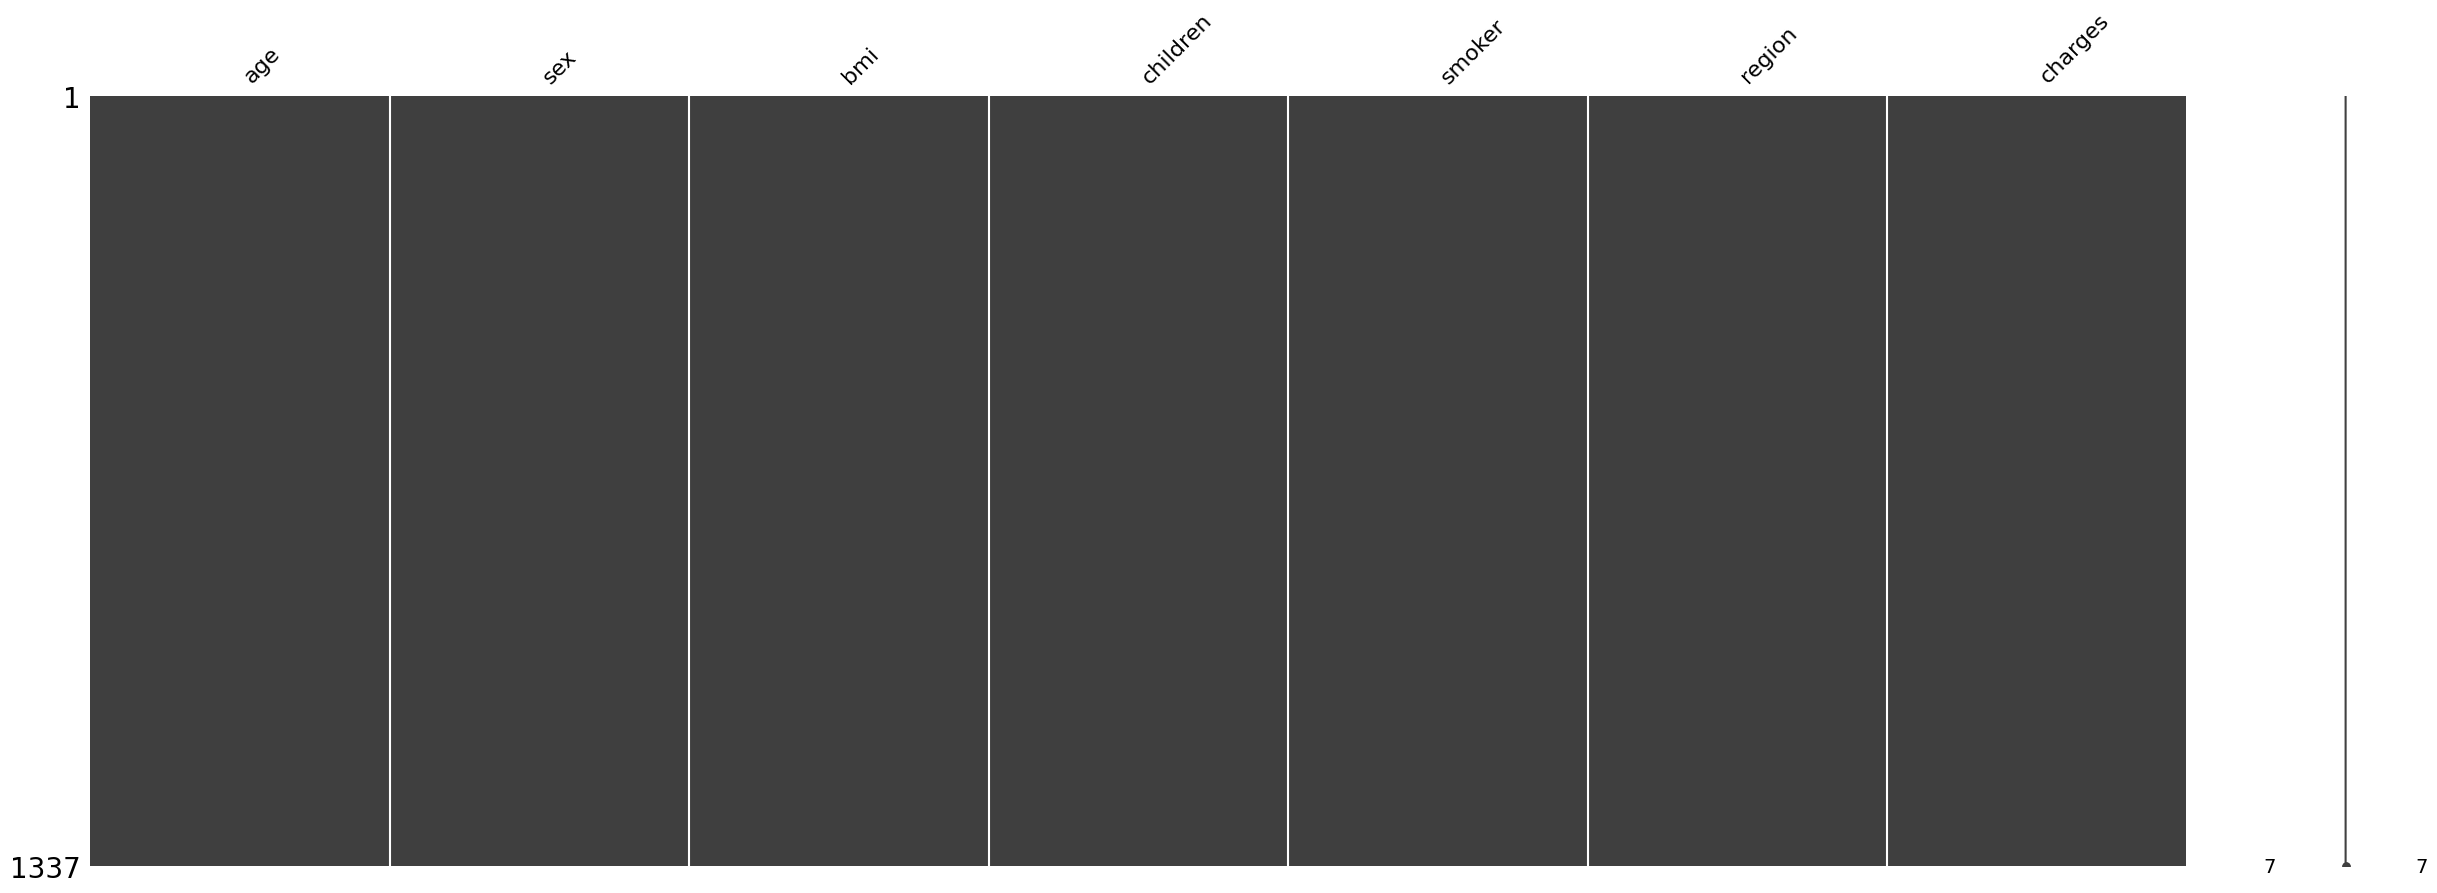

In [77]:
# NULL 값을 해당 컬럼의 평균값으로 대체하기
data['bmi'].fillna(data['bmi'].mean(), inplace=True)

# 확인
count_nan = data.isnull().sum()
print(count_nan)

# missingno 패키지를 통해 시각화 재확인
missingno.matrix(data, figsize=(30, 10))